In [1]:
import tensorflow as tf

tf.random.set_seed(0)

n_input = 30
n_hidden = 10
n_output = 1  # binary classification

In [2]:
w1 = tf.Variable(tf.random.normal([n_input, n_hidden]))
w2 = tf.Variable(tf.random.normal([n_hidden, n_output]))

b1 = tf.Variable(tf.random.normal([n_hidden]))
b2 = tf.Variable(tf.random.normal([n_output]))

optimizer = tf.optimizers.Adam()

2022-03-05 05:29:10.305111: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-05 05:29:10.306289: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
def forward(x):
    hidden = x @ w1 + b1
    hidden = tf.nn.tanh(hidden)
    logits = hidden @ w2 + b2
    prediction = tf.nn.sigmoid(logits)
    return prediction


@tf.function
def step(X, y):
    with tf.GradientTape() as tape:
        prediction = forward(X)
        loss = tf.losses.binary_crossentropy(y_true=y, y_pred=prediction)
        loss = tf.reduce_mean(loss)

    weights = [w1, b1, w2, b2]
    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    return loss

In [4]:
from sklearn.datasets import load_breast_cancer

X, Y = load_breast_cancer(return_X_y=True)
X = X.astype('float32')
y = Y.reshape(-1, 1)
X.shape, y.shape

((569, 30), (569, 1))

In [5]:
losses = []
for i in range(2000):
    loss = step(X, y)
    losses.append(loss)
    if i % 10 == 0:
        print("{:03d} : {:08.6f}".format(i, sum(losses[-10:]) / 10))

000 : 0.248778
010 : 2.465429
020 : 2.424778
030 : 2.384185
040 : 2.343645
050 : 2.303144
060 : 2.262675
070 : 2.222245
080 : 2.181867
090 : 2.141542
100 : 2.101273
110 : 2.061066
120 : 2.020927
130 : 1.980868
140 : 1.940872
150 : 1.900526
160 : 1.858323
170 : 1.816620
180 : 1.776935
190 : 1.737390
200 : 1.698025
210 : 1.658861
220 : 1.619923
230 : 1.581236
240 : 1.542834
250 : 1.504741
260 : 1.466983
270 : 1.429583
280 : 1.392596
290 : 1.356051
300 : 1.319979
310 : 1.284451
320 : 1.249455
330 : 1.215138
340 : 1.181514
350 : 1.148635
360 : 1.116564
370 : 1.085359
380 : 1.055079
390 : 1.025778
400 : 0.997510
410 : 0.970331
420 : 0.944298
430 : 0.919461
440 : 0.895861
450 : 0.873530
460 : 0.852486
470 : 0.832681
480 : 0.813842
490 : 0.795775
500 : 0.778697
510 : 0.763527
520 : 0.749641
530 : 0.736832
540 : 0.725163
550 : 0.714645
560 : 0.704509
570 : 0.695616
580 : 0.687384
590 : 0.679975
600 : 0.673270
610 : 0.667676
620 : 0.662932
630 : 0.658880
640 : 0.655396
650 : 0.652390
660 : 0.64

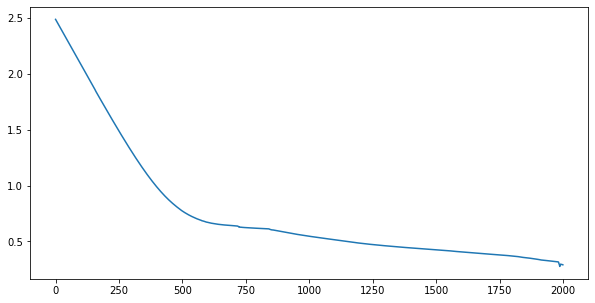

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.savefig('loss.jpg', bbox_inches='tight')